# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

C:\Users\catye\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 資料準備

In [2]:
(x_img_train,y_label_train), (x_img_test, y_label_test)=cifar100.load_data(label_mode='coarse')

In [3]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [4]:
# 查詢檔案維度資訊
print('x_img_train:',x_img_train.shape)
print('y_label_train:',y_label_train.shape)
print('x_img_test:',x_img_test.shape)
print('y_label_test:',y_label_test.shape)

x_img_train: (50000, 32, 32, 3)
y_label_train: (50000, 1)
x_img_test: (10000, 32, 32, 3)
y_label_test: (10000, 1)


In [5]:
#針對物件圖像數據集的類別編列成字典

label_dict={0:"aquatic mammals",1:"fish",2:"flowers",3:"food containers",4:"fruit and vegetables",
            5:"household electrical devices",6:"household furniture",7:"insects",8:"large carnivores",9:"large man-made outdoor things",
           10:"large natural outdoor scenes",11:"large omnivores and herbivores",12:"medium-sized mammals",13:"non-insect invertebrates",14:"people",
           15:"reptiles",16:"small mammals",17:"trees",18:"vehicles 1",20:"vehicles 2",}

In [6]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=20):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

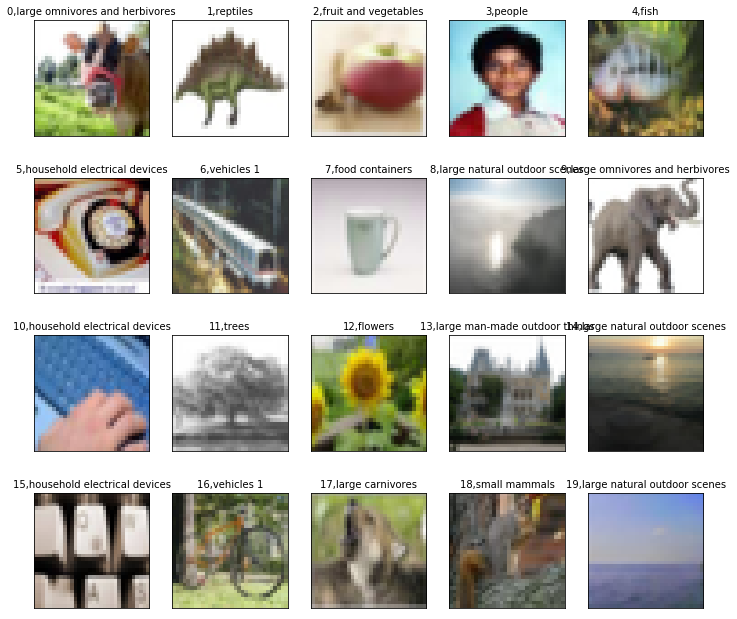

In [7]:
#針對不同的影像作標記
plot_images_labels_prediction(x_img_train,y_label_train,[],0)

# Image normalize 

In [8]:
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [9]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [10]:
x_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [11]:
y_label_train.shape

(50000, 1)

In [12]:
y_label_train[:5]

array([[11],
       [15],
       [ 4],
       [14],
       [ 1]])

In [13]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [14]:
y_label_train_OneHot.shape

(50000, 20)

In [15]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)